In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv("./xAPI-Edu-Data.csv")

cat_columns = [x for x in df.columns if x not in ['raisedhands',
               'VisITedResources', 'AnnouncementsView', 'Discussion', 'Class']]
float_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# One-Hot Encoding Categorical Data
df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

# Scale Continuous DataSet
sc = StandardScaler()
df[float_columns] = sc.fit_transform(df[float_columns])

X = df[[x for x in df.columns if x not in ['Class']]]
T = df['Class']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from colorama import Fore

x_train, x_test, y_train, y_test = train_test_split(X, T, test_size=0.3, random_state=13725)
accuracy_list=[]

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, log_reg_pred))
print(Fore.GREEN + f"Accuracy of Logistic Regression is: {100*log_reg_acc:.2f}%")

              precision    recall  f1-score   support

           H       0.70      0.70      0.70        37
           L       0.74      0.86      0.80        37
           M       0.77      0.70      0.73        70

    accuracy                           0.74       144
   macro avg       0.74      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144

Accuracy of Logistic Regression is: 74.31%


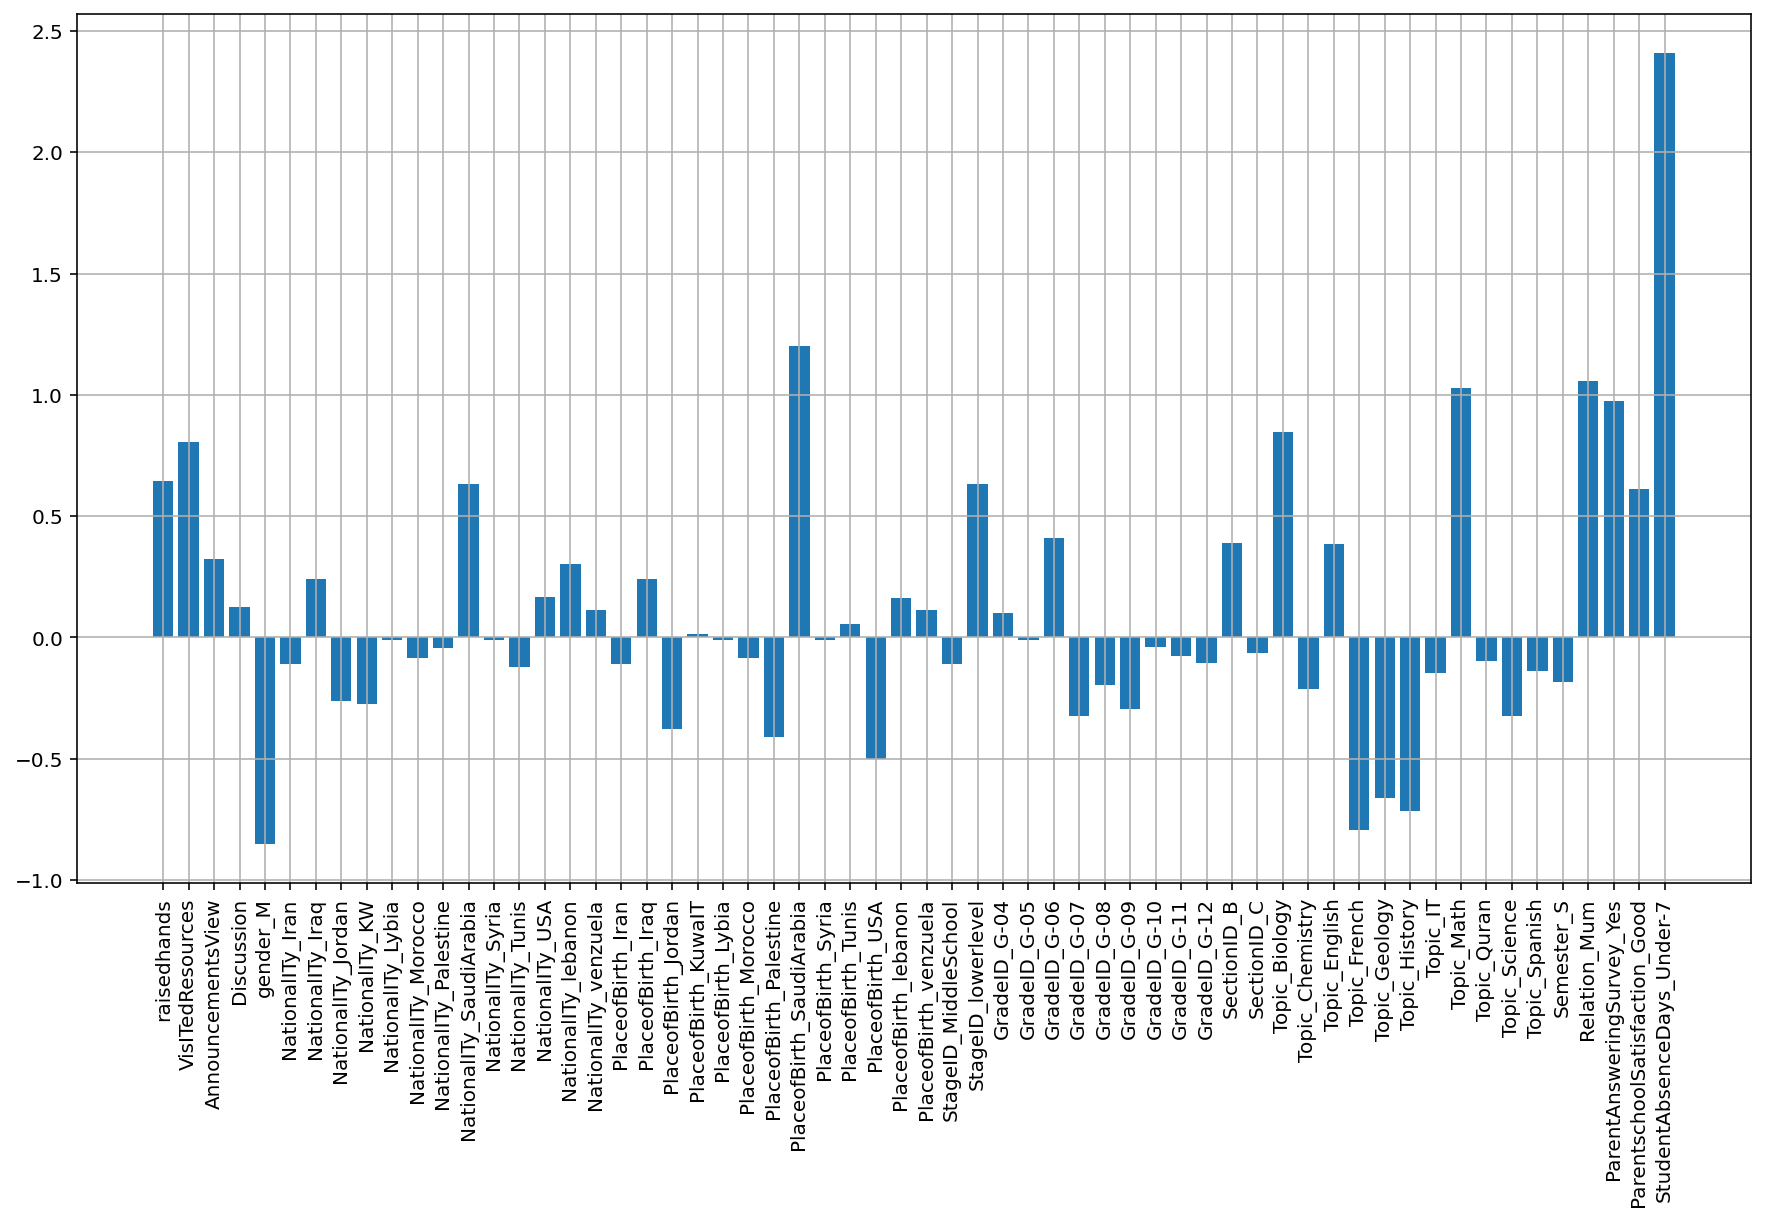

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# log_reg.coef_.shape
plt.figure(figsize=(15,8))
plt.rcParams['axes.grid'] = True
plt.bar(X.columns, log_reg.coef_[0,:])
plt.xticks(rotation=90)
plt.show()

## Support Vector

In [41]:
from sklearn.svm import SVC

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100*sv_clf_acc)
print(classification_report(y_test, sv_clf_pred))
print(Fore.GREEN + f"Accuracy of Support Vector Classifier is: {100*sv_clf_acc:.2f}%")

              precision    recall  f1-score   support

           H       0.61      0.59      0.60        37
           L       0.74      0.86      0.80        37
           M       0.71      0.66      0.68        70

    accuracy                           0.69       144
   macro avg       0.69      0.71      0.69       144
weighted avg       0.69      0.69      0.69       144

Accuracy of Support Vector Classifier is: 69.44%


## XGBClassifier

In [43]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train, eval_metric='mlogloss')
xgb_clf_pred = xgb_clf.predict(x_test)
xgb_clf_acc = accuracy_score(y_test, xgb_clf_pred)
accuracy_list.append(100*xgb_clf_acc)
print(classification_report(y_test, xgb_clf_pred))
print(Fore.GREEN + f"Accuracy of XGBClassifier is: {100*xgb_clf_acc:.2f}%")

              precision    recall  f1-score   support

           H       0.69      0.78      0.73        37
           L       0.70      0.95      0.80        37
           M       0.83      0.61      0.70        70

    accuracy                           0.74       144
   macro avg       0.74      0.78      0.75       144
weighted avg       0.76      0.74      0.74       144

Accuracy of XGBClassifier is: 74.31%


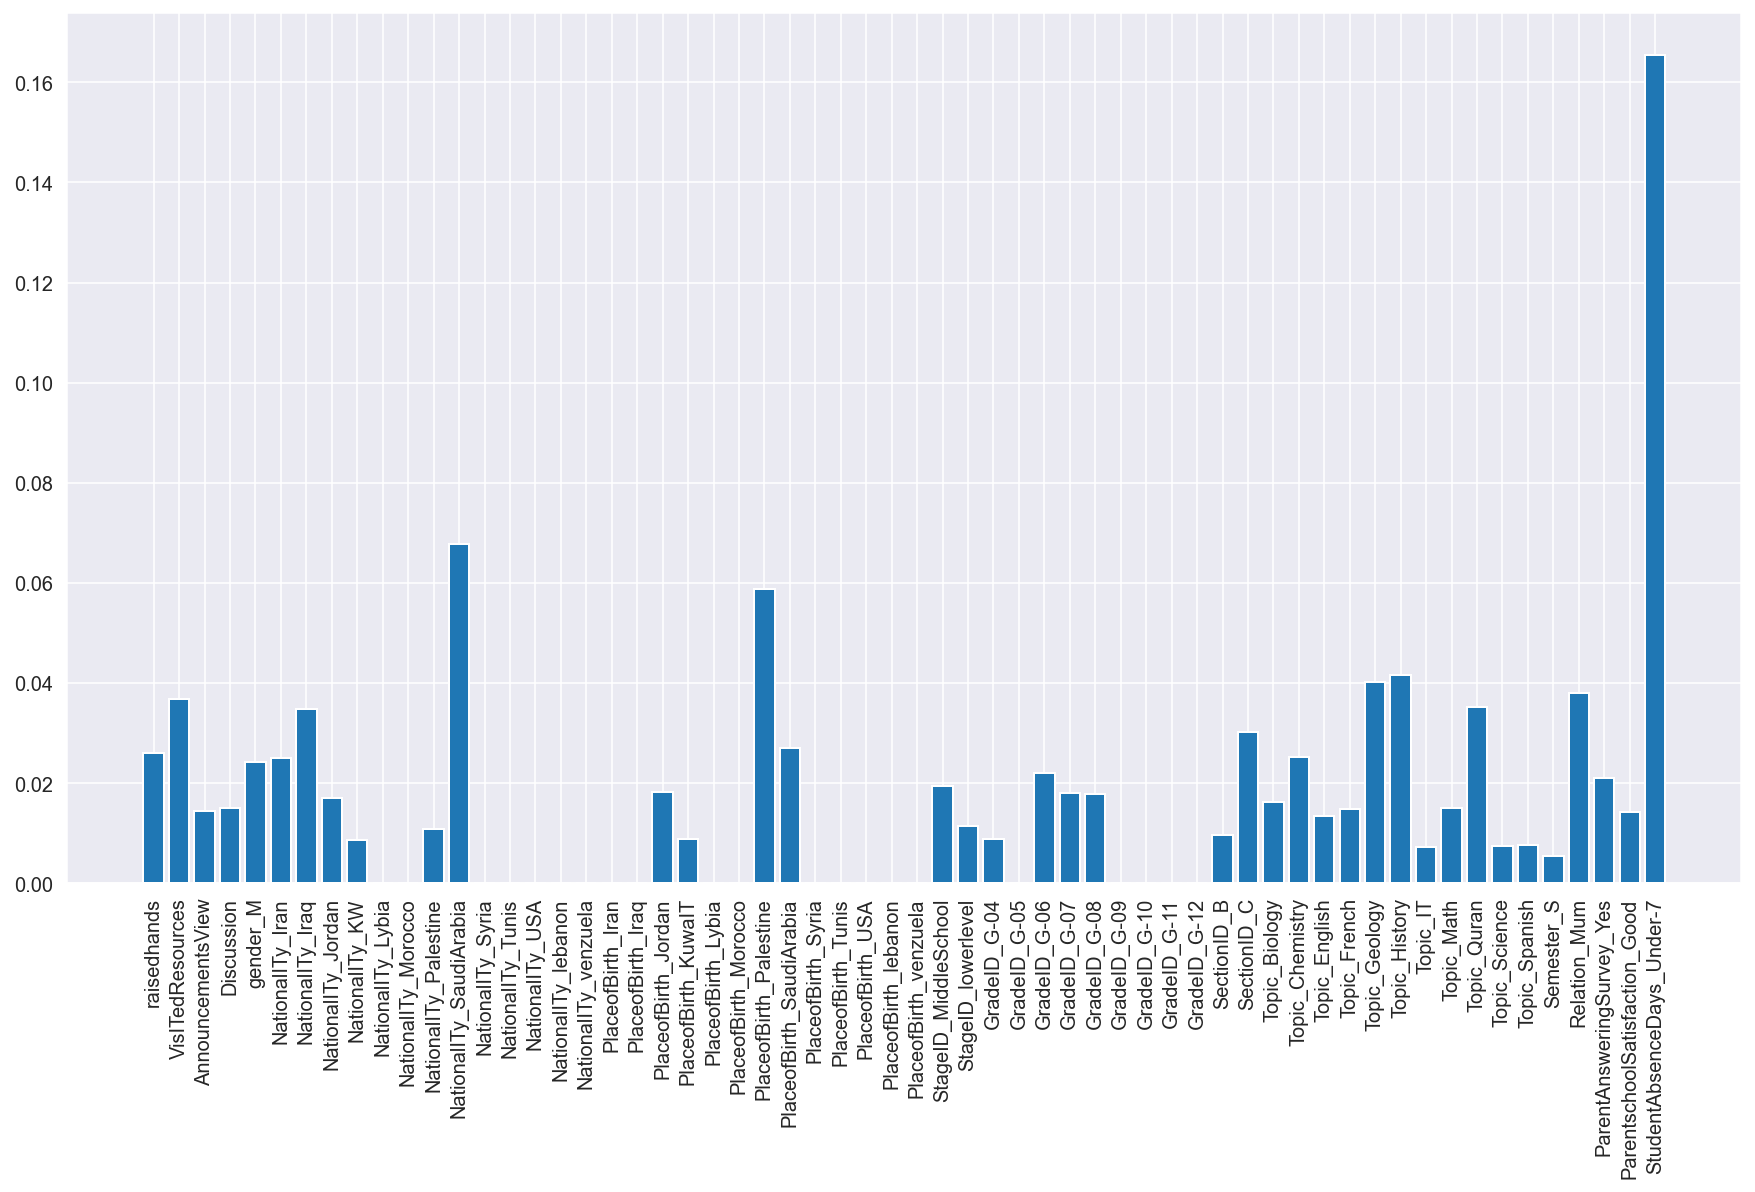

In [58]:
plt.figure(figsize=(15,8))
plt.rcParams['axes.grid'] = True
plt.bar(X.columns, xgb_clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [45]:
model_list=['Logistic Regression', 'Support Vector Classifier', 'XGBClassifier']

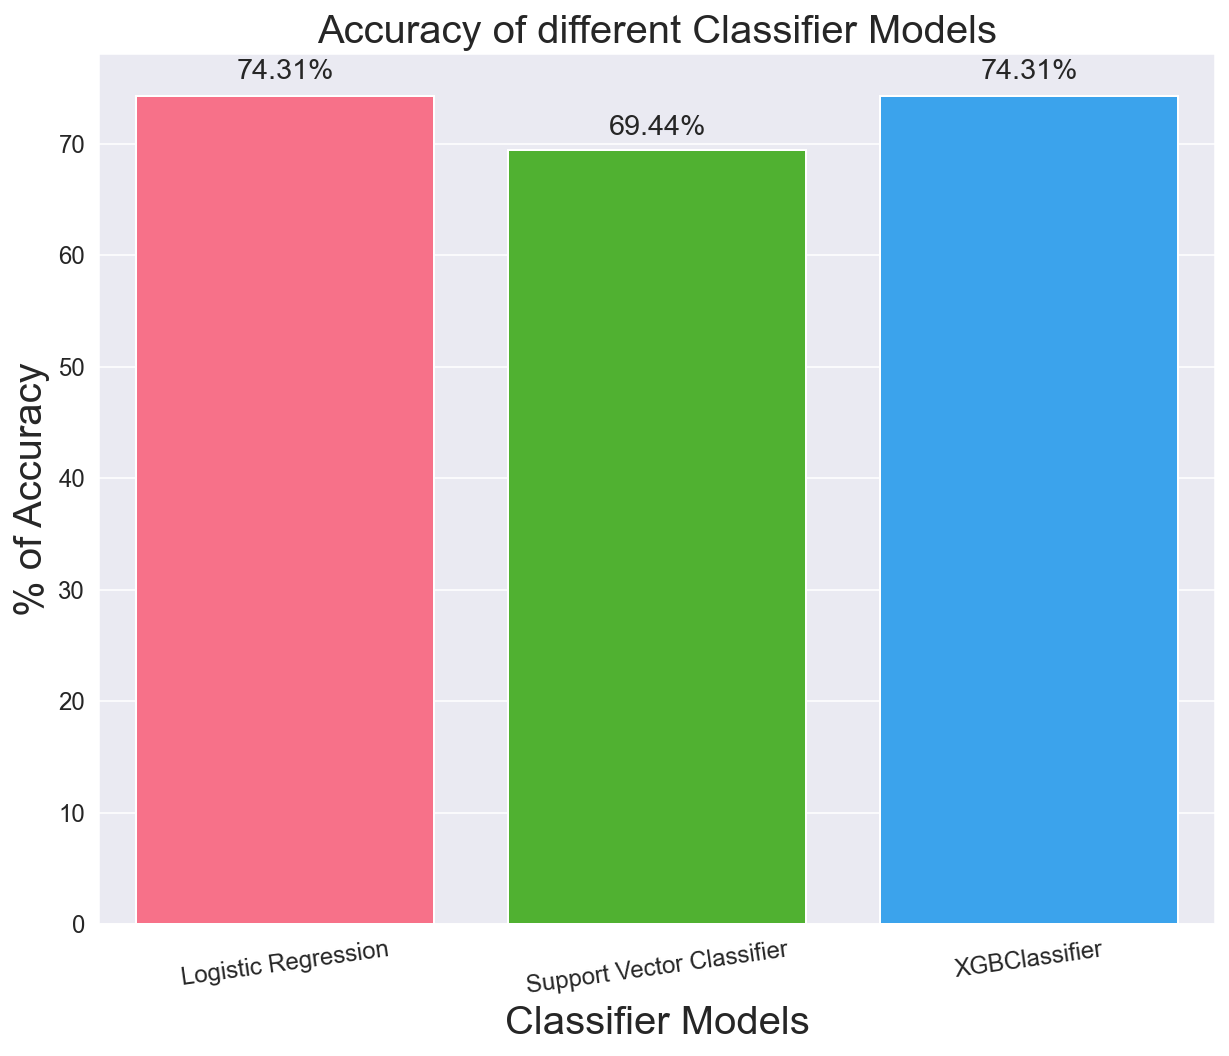

In [54]:
import seaborn as sns

plt.rcParams['figure.figsize']=10, 8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette="husl", saturation=2.0)
plt.xlabel('Classifier Models', fontsize=20)
plt.ylabel('% of Accuracy', fontsize=20)
plt.title('Accuracy of different Classifier Models', fontsize=20)
plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x+width/2, y+height*1.02), ha='center', fontsize='x-large')
plt.show()